In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df1 = df.drop(['year'],axis=1)

In [4]:
df1['churn'] = df1['churn'].map({1.0: 'Yes', 0.0: 'No'})

In [5]:
df2 = df1.fillna({'gender': df1['gender'].mode().iloc[0], 
            'maximum_days_inactive': df1['maximum_days_inactive'].median(),
           'churn': df1['churn'].value_counts().idxmin()})

In [6]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


<Axes: ylabel='weekly_mins_watched'>

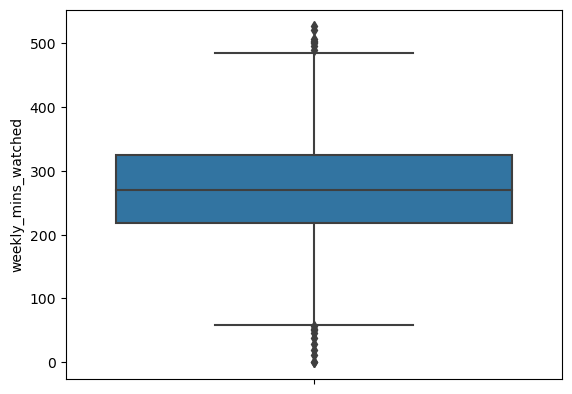

In [7]:
sns.boxplot(y=df2['weekly_mins_watched'])

In [8]:
week_mins_watched_sorted = df2['weekly_mins_watched'].sort_values(ascending=True)

In [9]:
q1 = week_mins_watched_sorted.quantile(.25) # Q1 is 25 percentile

In [10]:
q3 = week_mins_watched_sorted.quantile(.75) # Q3 is 75 percentile

In [11]:
iqr = q3 - q1

In [12]:
lower_bound = q1 - (iqr * 1.5)

In [13]:
upper_bound = q3 + (iqr * 1.5)

In [14]:
lower_bound

58.51874999999998

In [15]:
upper_bound

484.36875000000003

In [16]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


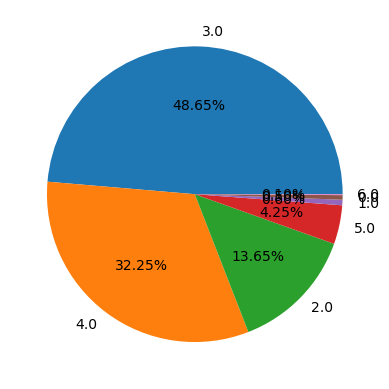

In [17]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

In [18]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie

In [19]:
df2['maximum_days_inactive'].value_counts(dropna=False)

3.0    973
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

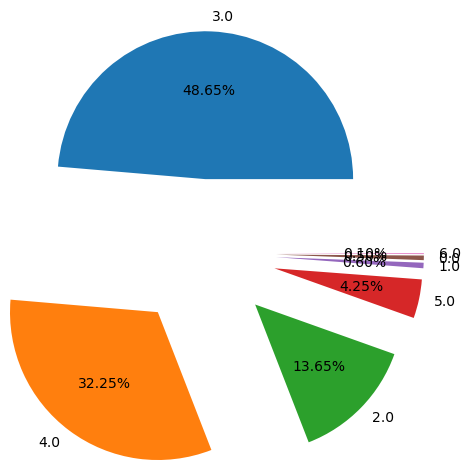

In [20]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%",
       explode=[.5, .5, .5, .5, .5, .5, .5])
plt.show()

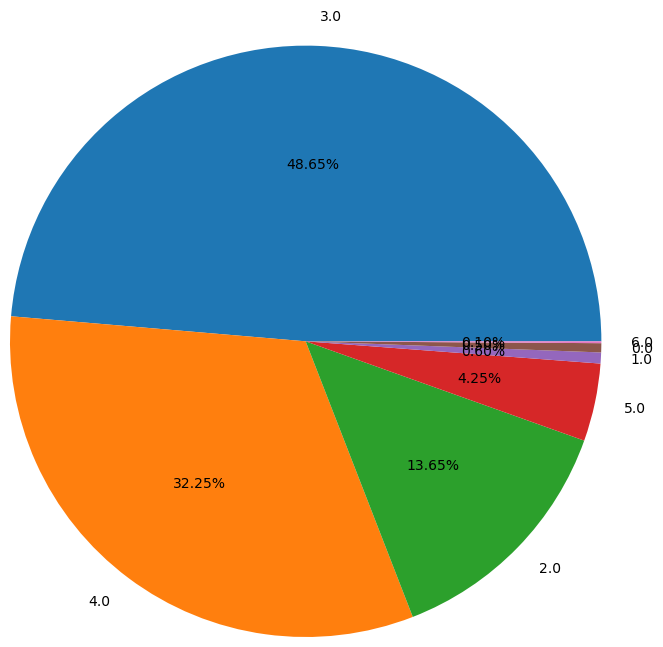

In [21]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%",
       radius=2)
plt.show()

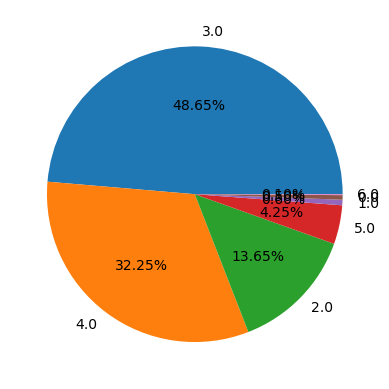

In [22]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

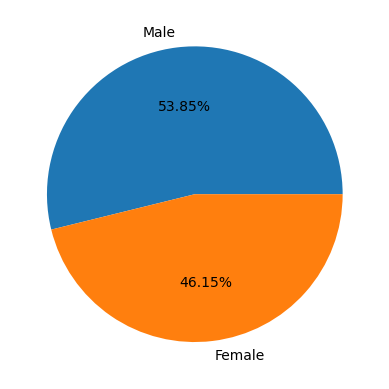

In [23]:
plt.pie(df2['gender'].value_counts(dropna=False),
       labels=df2['gender'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

### Outlier handling

<Axes: ylabel='weekly_mins_watched'>

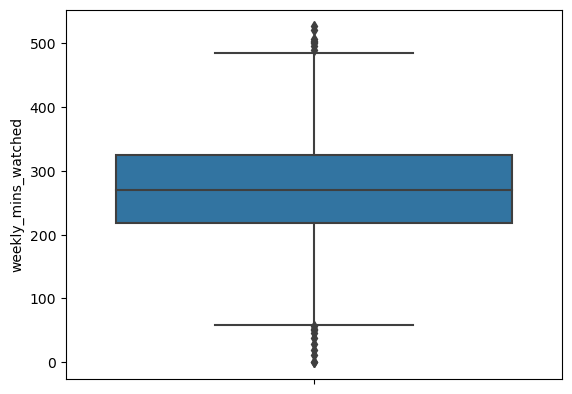

In [24]:
sns.boxplot(y=df2['weekly_mins_watched'])

In [25]:
upper_bound

484.36875000000003

In [26]:
lower_bound

58.51874999999998

In [27]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
31,111338,351-7269,Male,45,161,no,no,499.35,5.4,56.59,128,9,2.0,4,Yes
283,225874,393-4823,Male,42,82,no,no,494.70,10.6,56.07,102,6,3.0,0,Yes
300,234709,370-9533,Female,38,138,no,yes,29.25,7.9,3.32,111,1,3.0,0,No
304,235673,337-4339,Male,39,53,no,yes,38.85,6.5,4.40,64,7,2.0,1,No
569,361426,361-5225,Male,34,122,no,no,52.65,12.7,5.97,58,2,4.0,1,No
785,466759,392-2555,Male,26,98,no,no,0.00,6.8,0.00,88,1,2.0,4,Yes
937,538753,408-4530,Female,42,63,no,yes,46.35,8.6,5.25,101,7,3.0,1,No
1077,599684,378-6772,Male,38,98,yes,no,18.75,7.7,2.13,88,9,3.0,1,No
1126,621278,332-6181,Female,36,129,no,no,501.45,10.4,56.83,83,6,3.0,0,Yes
1256,679437,337-1225,Male,24,66,no,no,51.00,11.5,5.78,120,3,4.0,0,No


In [28]:
len(df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)])

18

Outliers are usually deleted.

We will NOT delete the outliers, we will rather replace them. The values which are lower than the lower bound, will be replaced by the lower limit value. And the values which are more than the upper bound, will be replaced by the upper bound value.

In [29]:
# This can be done using clip()

In [30]:
help(df2.clip)

Help on method clip in module pandas.core.frame:

clip(lower: 'float | None' = None, upper: 'float | None' = None, *args, axis: 'Axis | None' = None, inplace: 'bool' = False, **kwargs) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Trim values at input threshold(s).
    
    Assigns values outside boundary to boundary values. Thresholds
    can be singular values or array like, and in the latter case
    the clipping is performed element-wise in the specified axis.
    
    Parameters
    ----------
    lower : float or array-like, default None
        Minimum threshold value. All values below this
        threshold will be set to it. A missing
        threshold (e.g `NA`) will not clip the value.
    upper : float or array-like, default None
        Maximum threshold value. All values above this
        threshold will be set to it. A missing
        threshold (e.g `NA`) will not clip the value.
    axis : {{0 or 'index', 1 or 'columns', None}}, default None
 

In [31]:
df2['weekly_mins_watched'].clip(lower=lower_bound, upper=upper_bound)

0       148.35
1       294.45
2        87.30
3       321.30
4       243.00
         ...  
1995    182.25
1996    273.45
1997    128.85
1998    178.05
1999    326.70
Name: weekly_mins_watched, Length: 2000, dtype: float64

In [32]:
weekly_mins_clipped = df2['weekly_mins_watched'].clip(lower=lower_bound, upper=upper_bound)

<Axes: ylabel='weekly_mins_watched'>

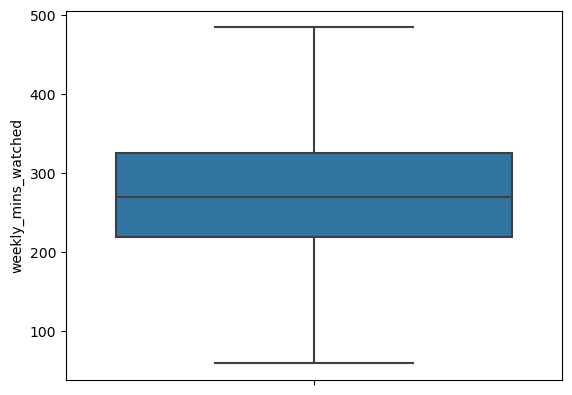

In [33]:
sns.boxplot(y=weekly_mins_clipped)

<Axes: ylabel='weekly_mins_watched'>

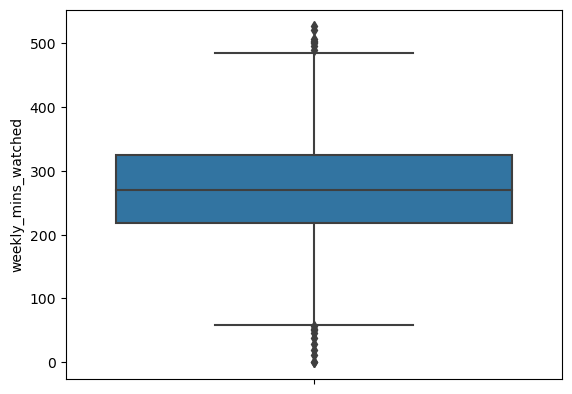

In [34]:
sns.boxplot(y=df2['weekly_mins_watched'])

In [35]:
# df2['weekly_mins_watched'] = df2['weekly_mins_watched'].clip(lower=lower_bound, upper=upper_bound)

In [36]:
week_mins_watched_sorted[(week_mins_watched_sorted < lower_bound) | (week_mins_watched_sorted > upper_bound)]

785       0.00
1411      0.00
1614     11.85
1077     18.75
300      29.25
304      38.85
937      46.35
1256     51.00
569      52.65
1476     56.70
1936    489.75
283     494.70
31      499.35
1126    501.45
1838    503.25
1261    506.10
1523    520.20
1380    526.20
Name: weekly_mins_watched, dtype: float64

In [37]:
weekly_mins_clipped[(weekly_mins_clipped < lower_bound) | (weekly_mins_clipped > upper_bound)]

Series([], Name: weekly_mins_watched, dtype: float64)

In [40]:
weekly_mins_clipped.loc[1936]

484.36875000000003

In [41]:
weekly_mins_clipped.loc[785]

58.51874999999998

In [42]:
18/2000

0.009

In [43]:
# We can delete the rows having the outliers

In [44]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
31,111338,351-7269,Male,45,161,no,no,499.35,5.4,56.59,128,9,2.0,4,Yes
283,225874,393-4823,Male,42,82,no,no,494.70,10.6,56.07,102,6,3.0,0,Yes
300,234709,370-9533,Female,38,138,no,yes,29.25,7.9,3.32,111,1,3.0,0,No
304,235673,337-4339,Male,39,53,no,yes,38.85,6.5,4.40,64,7,2.0,1,No
569,361426,361-5225,Male,34,122,no,no,52.65,12.7,5.97,58,2,4.0,1,No
785,466759,392-2555,Male,26,98,no,no,0.00,6.8,0.00,88,1,2.0,4,Yes
937,538753,408-4530,Female,42,63,no,yes,46.35,8.6,5.25,101,7,3.0,1,No
1077,599684,378-6772,Male,38,98,yes,no,18.75,7.7,2.13,88,9,3.0,1,No
1126,621278,332-6181,Female,36,129,no,no,501.45,10.4,56.83,83,6,3.0,0,Yes
1256,679437,337-1225,Male,24,66,no,no,51.00,11.5,5.78,120,3,4.0,0,No


In [45]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)].index

Int64Index([  31,  283,  300,  304,  569,  785,  937, 1077, 1126, 1256, 1261,
            1380, 1411, 1476, 1523, 1614, 1838, 1936],
           dtype='int64')

In [46]:
rows_to_delete = df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)].index

In [47]:
df2.drop(rows_to_delete)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


### Outlier detection and handling using Quantile method

- Quantile method:
    - Any value which is less than 'X' percentile and more than 'Y' percentile is treated as an Outlier.
    - 'X' and 'Y' can be any value depending on the data
    - less than 4 percentile and more than 97 percentile
    - less than 1 percentile and more than 99 percentile

In [48]:
lower_limit = df2['weekly_mins_watched'].quantile(0.04)

In [49]:
lower_limit

124.482

In [50]:
upper_limit = df2['weekly_mins_watched'].quantile(0.97)

In [51]:
upper_limit

417.4545

In [52]:
weekly_mins_clipped_quantile = df2['weekly_mins_watched'].clip(lower=lower_limit, upper=upper_limit)

<Axes: ylabel='weekly_mins_watched'>

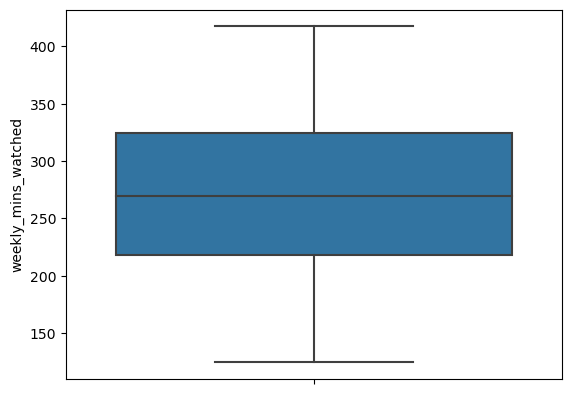

In [53]:
sns.boxplot(y=weekly_mins_clipped_quantile)

In [54]:
lower_limit

124.482

In [55]:
lower_bound

58.51874999999998

In [56]:
upper_limit

417.4545

In [57]:
upper_bound

484.36875000000003

In [58]:
df2['weekly_mins_watched'].sort_values().quantile(0.04)

124.482

### Encoding

- Encoding is done to encode the categorical data to numerical

In [59]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


In [60]:
# Change the churn column to 0 and 1

In [61]:
df2['churn'].map({'No':0, 'Yes':1})

0       0
1       0
2       1
3       0
4       0
       ..
1995    1
1996    0
1997    0
1998    0
1999    1
Name: churn, Length: 2000, dtype: int64

In [62]:
df2['churn'] = df2['churn'].map({'No':0, 'Yes':1})

In [63]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [64]:
df2['gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
1995    Female
1996      Male
1997      Male
1998      Male
1999      Male
Name: gender, Length: 2000, dtype: object

In [65]:
df2['gender'].map({'Female': 1, 'Male': 2})

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    2
1997    2
1998    2
1999    2
Name: gender, Length: 2000, dtype: int64

In [66]:
# get_dummies

In [67]:
pd.get_dummies(df2['gender'])

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,1
1998,0,1


In [68]:
gender_dummies = pd.get_dummies(df2['gender'])

In [69]:
gender_dummies

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,1
1998,0,1


In [70]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [71]:
# concat df2 and gender_dummies

In [72]:
df3 = pd.concat([df2, gender_dummies], axis=1)

In [73]:
df3

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [74]:
# Delete the column for which we created the dummies - 'gender'

In [75]:
df3.drop(['gender'], axis=1, inplace=True)

In [76]:
df3

,customer_id,phone_no,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,409-8743,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,351-8398,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,383-9255,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,353-2080,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,359-7788,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [77]:
pd.get_dummies(df3['multi_screen'])

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [78]:
pd.get_dummies(df3['mail_subscribed'])

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1995,0,1
1996,1,0
1997,1,0
1998,1,0


In [79]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
 

In [80]:
pd.get_dummies(df3['multi_screen'], prefix='multi_screen')

,multi_screen_no,multi_screen_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [81]:
pd.get_dummies(df3['mail_subscribed'], prefix='mail_subs')

,mail_subs_no,mail_subs_yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1995,0,1
1996,1,0
1997,1,0
1998,1,0


In [82]:
df3

,customer_id,phone_no,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,409-8743,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,351-8398,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,383-9255,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,353-2080,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,359-7788,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


### Corelation

In [83]:
df3.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
customer_id,1.000000,0.023830,-0.011457,-0.013830,0.033733,-0.013834,0.009713,0.063967,0.047070,-0.036009,-0.081924,0.012224,-0.012224
age,0.023830,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006334,0.000618,0.009222,0.008814,-0.008814
no_of_days_subscribed,-0.011457,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002344,0.001785,-0.001785
weekly_mins_watched,-0.013830,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.164291,-0.002754,0.002754
minimum_daily_mins,0.033733,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.063259,-0.013182,0.013182
maximum_daily_mins,-0.013834,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.164292,-0.002742,0.002742
weekly_max_night_mins,0.009713,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.001123,-0.033571,0.033571
videos_watched,0.063967,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.027308,-0.027563,0.027563
maximum_days_inactive,0.047070,0.006334,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044858,-0.027430,0.027430
customer_support_calls,-0.036009,0.000618,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.199488,-0.007537,0.007537


In [84]:
# Correlation value is between -1 and +1

In [85]:
df3.columns

Index(['customer_id', 'phone_no', 'age', 'no_of_days_subscribed',
       'multi_screen', 'mail_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn', 'Female', 'Male'],
      dtype='object')

In [86]:
cols_for_corr = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'weekly_max_night_mins',
                'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'Female', 'Male', 'churn']

In [88]:
df4 = df3[cols_for_corr]

In [89]:
df4

,age,no_of_days_subscribed,weekly_mins_watched,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,Female,Male,churn
0,36,62,148.35,82,1,4.0,1,1,0,0
1,39,149,294.45,87,3,3.0,2,1,0,0
2,65,126,87.30,91,1,4.0,5,1,0,1
3,24,131,321.30,102,4,3.0,3,1,0,0
4,40,191,243.00,83,7,3.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,54,75,182.25,97,5,4.0,2,1,0,1
1996,45,127,273.45,116,3,3.0,1,0,1,0
1997,53,94,128.85,110,16,5.0,0,0,1,0
1998,40,94,178.05,100,6,3.0,3,0,1,0


In [90]:
df4.corr()

,age,no_of_days_subscribed,weekly_mins_watched,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,Female,Male,churn
age,1.000000,0.038822,0.016316,0.016645,0.013076,0.006334,0.000618,0.008814,-0.008814,0.009222
no_of_days_subscribed,0.038822,1.000000,0.000657,-0.001967,0.019414,0.019338,0.013419,0.001785,-0.001785,0.002344
weekly_mins_watched,0.016316,0.000657,1.000000,0.037715,0.018619,-0.014018,-0.036848,-0.002754,0.002754,0.164291
weekly_max_night_mins,0.016645,-0.001967,0.037715,1.000000,-0.000298,0.026565,-0.003965,-0.033571,0.033571,0.001123
videos_watched,0.013076,0.019414,0.018619,-0.000298,1.000000,0.033929,-0.001201,-0.027563,0.027563,-0.027308
maximum_days_inactive,0.006334,0.019338,-0.014018,0.026565,0.033929,1.000000,-0.001523,-0.027430,0.027430,0.044858
customer_support_calls,0.000618,0.013419,-0.036848,-0.003965,-0.001201,-0.001523,1.000000,-0.007537,0.007537,0.199488
Female,0.008814,0.001785,-0.002754,-0.033571,-0.027563,-0.027430,-0.007537,1.000000,-1.000000,0.008277
Male,-0.008814,-0.001785,0.002754,0.033571,0.027563,0.027430,0.007537,-1.000000,1.000000,-0.008277
churn,0.009222,0.002344,0.164291,0.001123,-0.027308,0.044858,0.199488,0.008277,-0.008277,1.000000


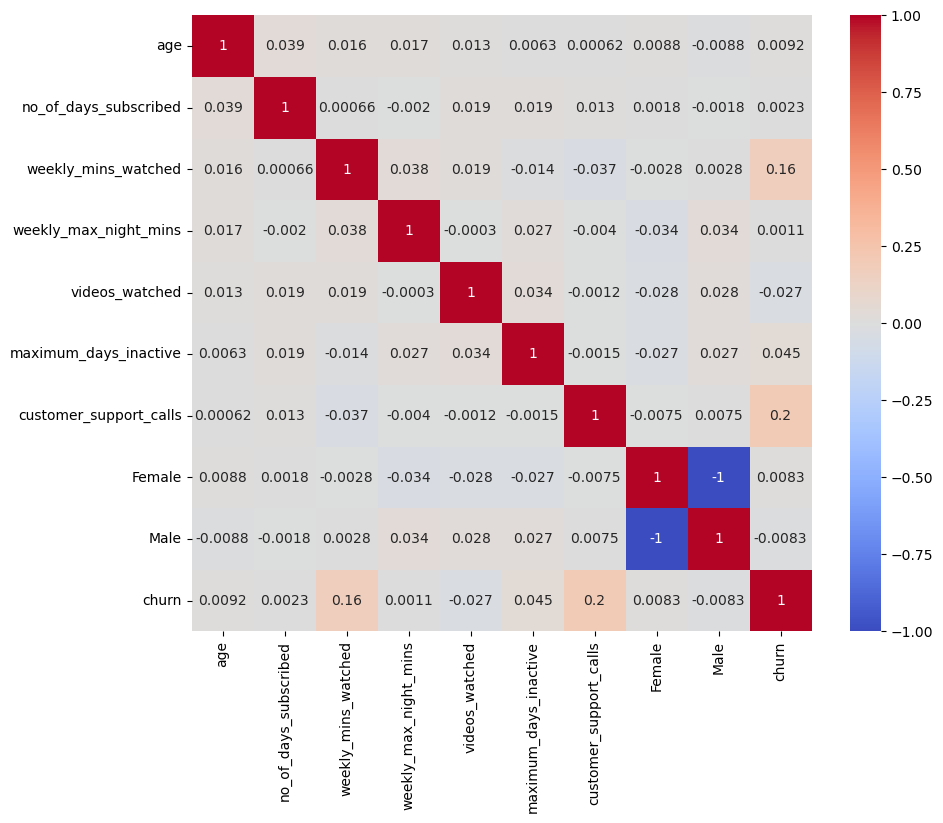

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')
plt.show()

### Exploratory Data Analysis (EDA)

- Exploring/understanding the data and its nature
- Looking at the data from different perspective
- Fetching important and meaningful insights from the data

- Why is it that we focus on data? Why is data so important?
    - summarise the data and make stories around the data
    - for making informed decisions
    - forecasting to improve the business
    
- Why EDA is important?
    - FOr getting insights
    - For handling and cleaning data
    - EDA is an important step before we could move to machine learning
    - EDA helps us to understand the data - the columns/features, relation between the columns, the issues and problems associated with these columns and address them


- Data Dictionary: the dataset columns (also called as metadata - data about the data)
- Problem statement: the underlying issue/problem - we might need to find the problem statement as well when we perform EDA

#### Steps in EDA

- Understand the shape of the data
- Basic information about the data - number of cols, names of cols, number of rows, datatype of the cols, null values in each col, ...
- Statistical summary of the data
- Check for null values
- Check for duplicate values
- Check for unique values
- Understand the numerical and categorical cols
- Treat/deal with with null data Or handle null data
- Distribution of the data
- Treatment of null values
- Treatment of duplicate values
- Handle of unique values
- Co-relation
- Outliers detection and treatment
- Graphs
- Encoding

In [95]:
df3

,customer_id,phone_no,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,409-8743,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,351-8398,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,383-9255,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,353-2080,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,359-7788,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [96]:
# The columns which we think are NOT important can be deleted - 'phone_no'

In [97]:
df3.drop(['phone_no'], axis=1, inplace=True)

In [98]:
df3

,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [99]:
# groupby

In [101]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [102]:
# fetch the data/rows for the female customers

In [103]:
df2.query("gender == 'Female'")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,991428,348-1528,Female,36,42,no,no,233.10,9.0,26.42,128,3,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1992,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1


In [104]:
df2.query("gender == 'Male'")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
5,101953,329-6603,Male,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1
6,103051,416-1845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0
8,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0
9,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0
10,103697,411-9554,Male,34,114,no,yes,338.70,8.4,38.39,100,9,3.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [105]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [107]:
gender_group = df2.groupby('gender')

In [108]:
gender_group

In [109]:
list(gender_group)

[('Female',
        customer_id  phone_no  gender  age  no_of_days_subscribed multi_screen  \
  0          100198  409-8743  Female   36                     62           no   
  1          100643  340-5930  Female   39                    149           no   
  2          100756  372-3750  Female   65                    126           no   
  3          101595  331-4902  Female   24                    131           no   
  4          101653  351-8398  Female   40                    191           no   
  ...           ...       ...     ...  ...                    ...          ...   
  1986       991428  348-1528  Female   36                     42           no   
  1988       992113  333-2906  Female   61                    133           no   
  1992       994954  329-3222  Female   42                    119           no   
  1994       996524  351-9604  Female   60                    141           no   
  1995       997132  385-7387  Female   54                     75           no   
  
 

In [110]:
gender_group.get_group('Female')

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,991428,348-1528,Female,36,42,no,no,233.10,9.0,26.42,128,3,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1992,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1


In [111]:
df2[df2['gender'] == 'Female']

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,991428,348-1528,Female,36,42,no,no,233.10,9.0,26.42,128,3,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1992,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1


In [112]:
df2.nunique()

customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

In [113]:
df2.groupby(df2['age'] >= 50)

In [114]:
list(df2.groupby(df2['age'] >= 50))

[(False,
        customer_id  phone_no  gender  age  no_of_days_subscribed multi_screen  \
  0          100198  409-8743  Female   36                     62           no   
  1          100643  340-5930  Female   39                    149           no   
  3          101595  331-4902  Female   24                    131           no   
  4          101653  351-8398  Female   40                    191           no   
  5          101953  329-6603    Male   31                     65           no   
  ...           ...       ...     ...  ...                    ...          ...   
  1992       994954  329-3222  Female   42                    119           no   
  1993       996129  401-3170    Male   36                    127           no   
  1996       998086  383-9255    Male   45                    127           no   
  1998       998934  359-7788    Male   40                     94           no   
  1999       999961  414-1496    Male   37                     73           no   
  
    

In [115]:
df2.groupby(df2['age'] >= 50).get_group(True)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
6,103051,416-1845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0
8,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0
19,107707,408-3532,Female,59,194,no,no,72.60,18.2,8.23,87,1,5.0,1,0
20,107962,356-7217,Male,57,104,no,no,246.30,10.7,27.91,117,8,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,989294,372-4835,Female,70,93,no,no,285.30,8.8,32.33,92,4,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1


In [116]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [118]:
# fetch all the customers who had 7 or more support calls

In [119]:
df2.query("customer_support_calls >= 7")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
103,138770,393-8736,Male,48,149,no,no,249.90,8.2,28.32,131,6,3.0,7,0
122,148966,405-7676,Female,32,146,no,no,223.95,7.9,25.38,100,4,3.0,7,1
156,165361,380-8727,Female,37,99,no,no,173.25,11.5,19.64,98,7,4.0,7,1
175,175022,371-1727,Female,29,103,no,no,225.90,10.4,25.60,104,8,3.0,8,1
230,201583,416-2778,Male,42,152,yes,yes,356.25,14.2,40.38,80,3,4.0,9,1
274,220614,392-1616,Male,37,122,no,yes,380.55,9.2,43.13,123,5,3.0,7,0
294,232757,397-9184,Male,36,93,no,yes,228.45,11.3,25.89,130,5,4.0,7,0
1307,698421,380-3437,Male,44,86,no,no,192.45,12.2,21.81,152,5,4.0,7,1
1472,762697,333-8822,Female,39,64,no,yes,315.00,5.9,35.70,94,4,2.0,8,0


In [122]:
df2.groupby((df2['age'] >= 50) & (df2['videos_watched'] > 10)).get_group(True)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
260,214276,392-6331,Male,50,111,no,no,295.65,9.3,33.51,101,11,3.0,0,0
578,364342,383-6029,Female,51,135,yes,yes,259.65,14.6,29.43,78,15,4.0,0,1
607,380040,402-3892,Male,53,118,no,no,401.70,14.4,45.53,91,11,4.0,5,1
690,423560,341-2603,Male,56,64,yes,yes,190.80,8.1,21.62,109,13,3.0,0,0
744,448233,356-1567,Male,54,106,no,no,334.50,7.1,37.91,107,12,2.0,0,0
1033,584007,385-8406,Male,53,45,no,no,311.40,12.4,35.29,125,13,4.0,1,0
1174,643397,411-5078,Female,54,136,no,no,213.45,6.0,24.19,75,11,2.0,2,0
1248,675304,375-2165,Female,59,162,no,no,330.90,10.5,37.50,89,11,3.0,1,0
1290,691528,411-7778,Male,51,60,yes,yes,398.85,14.0,45.20,82,12,4.0,0,1
1339,710626,334-8967,Male,57,120,no,yes,319.05,9.7,36.16,119,13,3.0,2,0


In [123]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [126]:
# fetch the customers who are subscribed since last 200 days and no support calls

In [127]:
df2.query("no_of_days_subscribed >= 200 and customer_support_calls == 0")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
991,565012,371-2500,Female,52,225,no,no,248.1,8.7,28.12,93,3,3.0,0,1
1186,647251,393-9619,Female,46,215,no,no,125.4,10.7,14.21,110,9,3.0,0,0


In [131]:
df2.groupby(['gender','churn']).size()

gender  churn
Female  0        783
        1        140
Male    0        920
        1        157
dtype: int64